In [111]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

In [112]:
# 1. For admission :
# 1. All cause admission left join:
path = '/home/daisy/FDA_Dataset/inpatient_all_final_1.csv'
inpatient_ad_train_1 = pd.read_csv(path).iloc[:,1:]

# 2. All cause admission inner join
path = '/home/daisy/FDA_Dataset/inpatient_all_final_2.csv'
inpatient_ad_train_2 = pd.read_csv(path).iloc[:,1:]

# 3. CVD admission left join
path = '/home/daisy/FDA_Dataset/inpatient_CVD_final_1.csv'
inpatient_ad_cvd_train_1 = pd.read_csv(path).iloc[:,1:]

# 4. CVD admission inner join
path = '/home/daisy/FDA_Dataset/inpatient_CVD_final_2.csv'
inpatient_ad_cvd_train_2 = pd.read_csv(path).iloc[:,1:]

# 2. For CVD mortality	
# left join:
path = '/home/daisy/FDA_Dataset/final_cvd_mortality_train_1.csv'
inpatient_mortality_cvd_train_1 = pd.read_csv(path).iloc[:,1:]

# inner join:
path = '/home/daisy/FDA_Dataset/final_cvd_mortality_train_2.csv'
inpatient_mortality_cvd_train_2 = pd.read_csv(path).iloc[:,1:]

#3. For all cause mortality
# left join
path = '/home/daisy/FDA_Dataset/final_allcause_mortality_train_1.csv'
inpatient_mortality_all_train_1 = pd.read_csv(path).iloc[:,1:]

# inner join
path = '/home/daisy/FDA_Dataset/final_allcause_mortality_train_2.csv'
inpatient_mortality_all_train_2 = pd.read_csv(path).iloc[:,1:]

In [113]:
inpatient_ad_train_1 # readmission within 300 days, CVD_readmission

inpatient_ad_cvd_train_1
    
inpatient_mortality_cvd_train_1

inpatient_mortality_all_train_1 # died_within_125days

,Internalpatientid,num_visits,CVD,Age 00-20,Age 20-40,Age 40-60,Age 60-80,Age 80-100,Age 100-120,age_mean,...,lab_count,lab_freq,lab_age_mean,lab_age_std,Height,Weight,Pulse oximetry min,Pulse oximetry max,Pulse oximetry mean,Pulse oximetry std
0,1,1483,1,0,0,26,1440,17,0,71.708835,...,290.0,12.61,71.979178,4.747024,71.878723,239.161669,89.0,103.0,95.899160,3.375874
1,2,2149,1,0,0,269,1880,0,0,65.058152,...,594.0,27.00,65.370390,3.971646,67.366878,183.643631,88.0,105.0,97.727079,3.363030
2,3,156,0,0,0,0,87,69,0,79.892190,...,1027.0,205.40,81.599486,0.560039,66.500000,NaN,NaN,NaN,NaN,NaN
3,4,336,1,0,0,0,47,289,0,81.903713,...,98.0,7.00,82.637824,2.862040,65.583333,180.149734,89.0,105.0,97.537037,3.864268
4,5,124,0,0,0,0,124,0,0,75.693176,...,65.0,21.67,76.087584,0.687725,70.238095,230.920161,89.0,98.0,93.500000,6.363961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133232,169060,1223,1,0,0,231,992,0,0,65.804712,...,399.0,26.60,63.398442,5.916780,68.916667,176.288196,88.0,103.0,96.243697,3.543833
133233,169061,119,1,0,0,0,104,15,0,75.477152,...,12.0,0.92,75.083324,4.292555,NaN,NaN,NaN,NaN,NaN,NaN
133234,169062,345,0,0,0,0,345,0,0,72.124667,...,96.0,24.00,72.544153,1.468975,73.157895,134.263541,88.0,88.0,88.000000,NaN
133235,169063,133,0,0,0,0,133,0,0,75.278206,...,13.0,2.60,73.734348,1.268574,NaN,NaN,NaN,NaN,NaN,NaN


In [114]:
inpatient_mortality_cvd_train_1 = inpatient_mortality_cvd_train_1.dropna()
cols = inpatient_mortality_cvd_train_1.columns
filter_ = (inpatient_mortality_cvd_train_1[cols] >= 0).all(axis=1)
inpatient_mortality_cvd_train_1 = inpatient_mortality_cvd_train_1[filter_]

In [115]:
inpatient_mortality_all_train_1 = inpatient_mortality_all_train_1.dropna()
inpatient_mortality_all_train_1

,Internalpatientid,num_visits,CVD,Age 00-20,Age 20-40,Age 40-60,Age 60-80,Age 80-100,Age 100-120,age_mean,...,lab_count,lab_freq,lab_age_mean,lab_age_std,Height,Weight,Pulse oximetry min,Pulse oximetry max,Pulse oximetry mean,Pulse oximetry std
0,1,1483,1,0,0,26,1440,17,0,71.708835,...,290.0,12.61,71.979178,4.747024,71.878723,239.161669,89.0,103.0,95.899160,3.375874
1,2,2149,1,0,0,269,1880,0,0,65.058152,...,594.0,27.00,65.370390,3.971646,67.366878,183.643631,88.0,105.0,97.727079,3.363030
5,8,387,1,0,0,4,383,0,0,67.692992,...,29.0,2.64,66.396480,3.359046,70.666667,188.872239,92.0,103.0,98.500000,2.868105
7,11,2279,1,0,0,686,1593,0,0,65.153617,...,452.0,19.65,64.609474,5.527343,68.666667,179.219752,91.0,104.0,97.753623,3.145519
8,13,1015,0,0,0,0,1015,0,0,74.887602,...,86.0,14.33,75.004228,1.568173,72.333333,212.054974,89.0,103.0,95.585859,3.528340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133224,169050,1051,0,0,0,646,405,0,0,58.740076,...,205.0,20.50,58.170509,2.720629,69.032653,252.478108,90.0,101.0,96.160000,3.210400
133225,169051,357,0,0,0,357,0,0,0,47.410650,...,53.0,5.89,48.027198,2.265512,66.590909,206.397424,95.0,103.0,99.500000,2.664583
133227,169053,1105,1,0,0,0,584,521,0,79.139511,...,453.0,56.62,79.177749,2.087995,71.470588,166.630058,85.0,105.0,96.126943,3.728716
133231,169057,6766,1,0,0,0,2655,4111,0,80.918961,...,602.0,27.36,80.319664,4.580680,71.930193,243.548719,19.0,105.0,98.128698,4.965332


In [116]:
X_mor = inpatient_mortality_all_train_1.drop(columns = ['Internalpatientid','died_within_125days'])
y_mor = inpatient_mortality_all_train_1[['died_within_125days']]

In [117]:
X_mor_cvd = inpatient_mortality_cvd_train_1.drop(columns = ['Internalpatientid','died_by_cvd'])
y_mor_cvd = inpatient_mortality_cvd_train_1[['died_by_cvd']]

## Feature selection 

### Tree based feature selection and random forest classification

the higher, the more important the feature. 

To use feature_importance method, in training data there should not be correlated features. Random forest choose randomly at each iteration, therefore sequence of feature importance list can change.

In [118]:
def rf_importance_score(X, y):
       clf_rf = RandomForestClassifier()      
       clr_rf = clf_rf.fit(X,y)
       importances = clr_rf.feature_importances_
       std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_],
              axis=0)
       indices = np.argsort(importances)[::-1]
       # Print the feature ranking
       # print("Feature ranking:")

       #for i in range(X.shape[1]):
       #    print(i, X.columns[indices[i]], importances[indices[i]])

       # Plot the feature importances of the forest

       plt.figure(1, figsize=(14, 13))
       plt.title("Feature importances")
       plt.bar(range(X.shape[1]), importances[indices],
              color="g", yerr=std[indices], align="center")
       plt.xticks(range(X.shape[1]), X.columns[indices],rotation=90)
       plt.xlim([-1, X.shape[1]])
       plt.show()

       score_list_rf = zip(X.columns[indices], importances[indices])
       features_to_keep_rf = [name for name,score in score_list_rf]
       return features_to_keep_rf

/tmp/ipykernel_402999/2208155826.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clr_rf = clf_rf.fit(X,y)


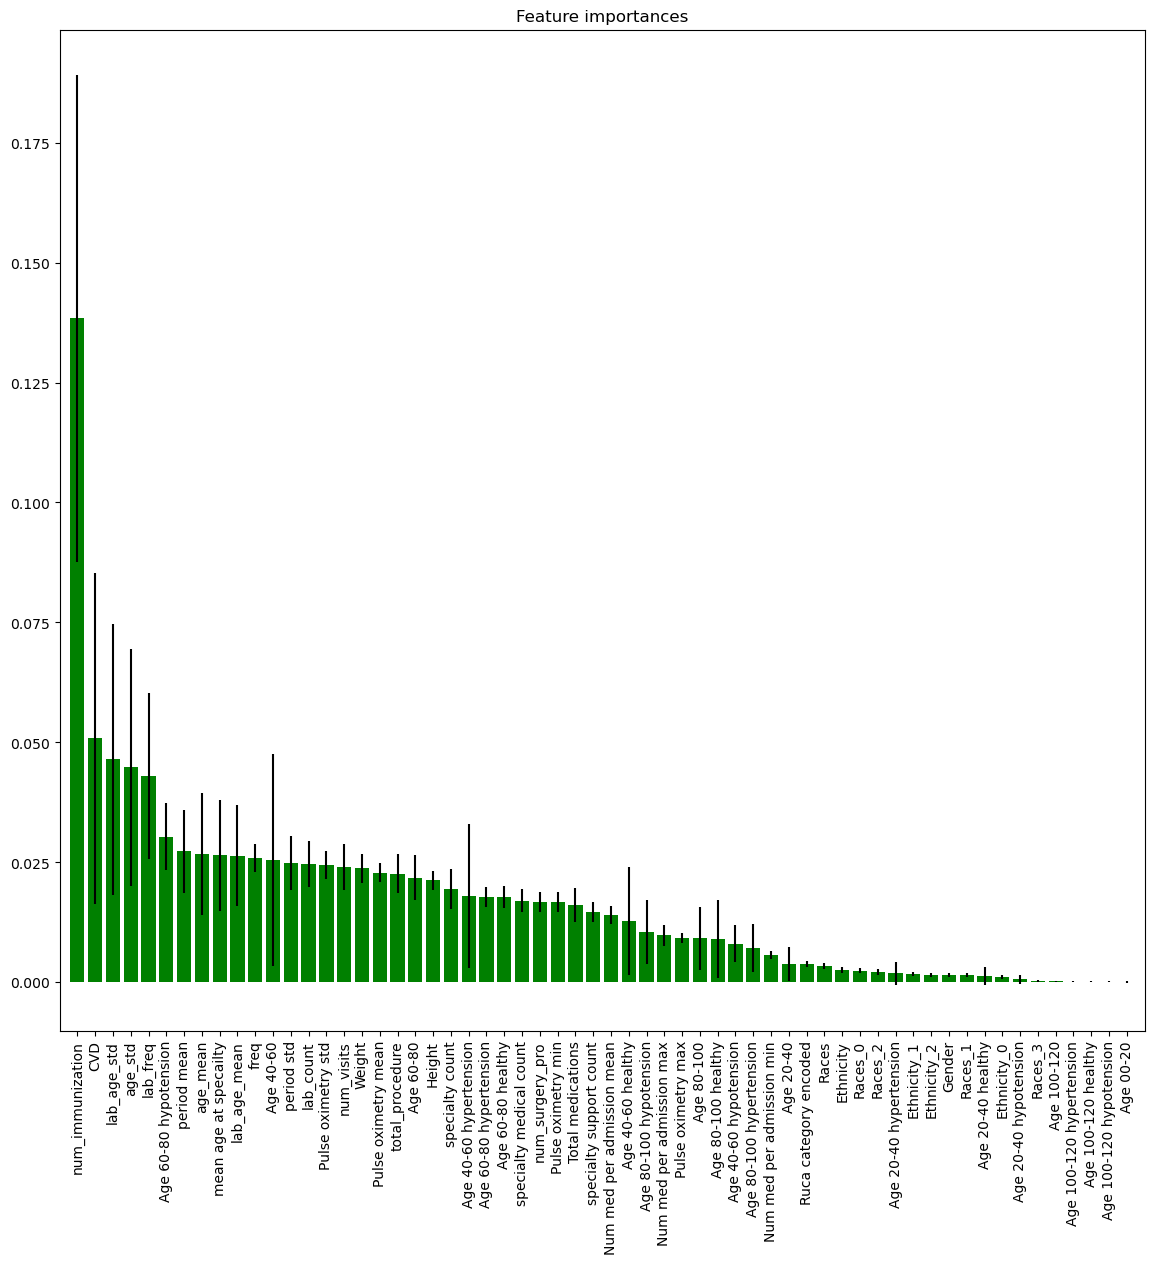

In [119]:
features_to_keep_mor_rf = rf_importance_score(X_mor, y_mor)

/tmp/ipykernel_402999/2208155826.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clr_rf = clf_rf.fit(X,y)


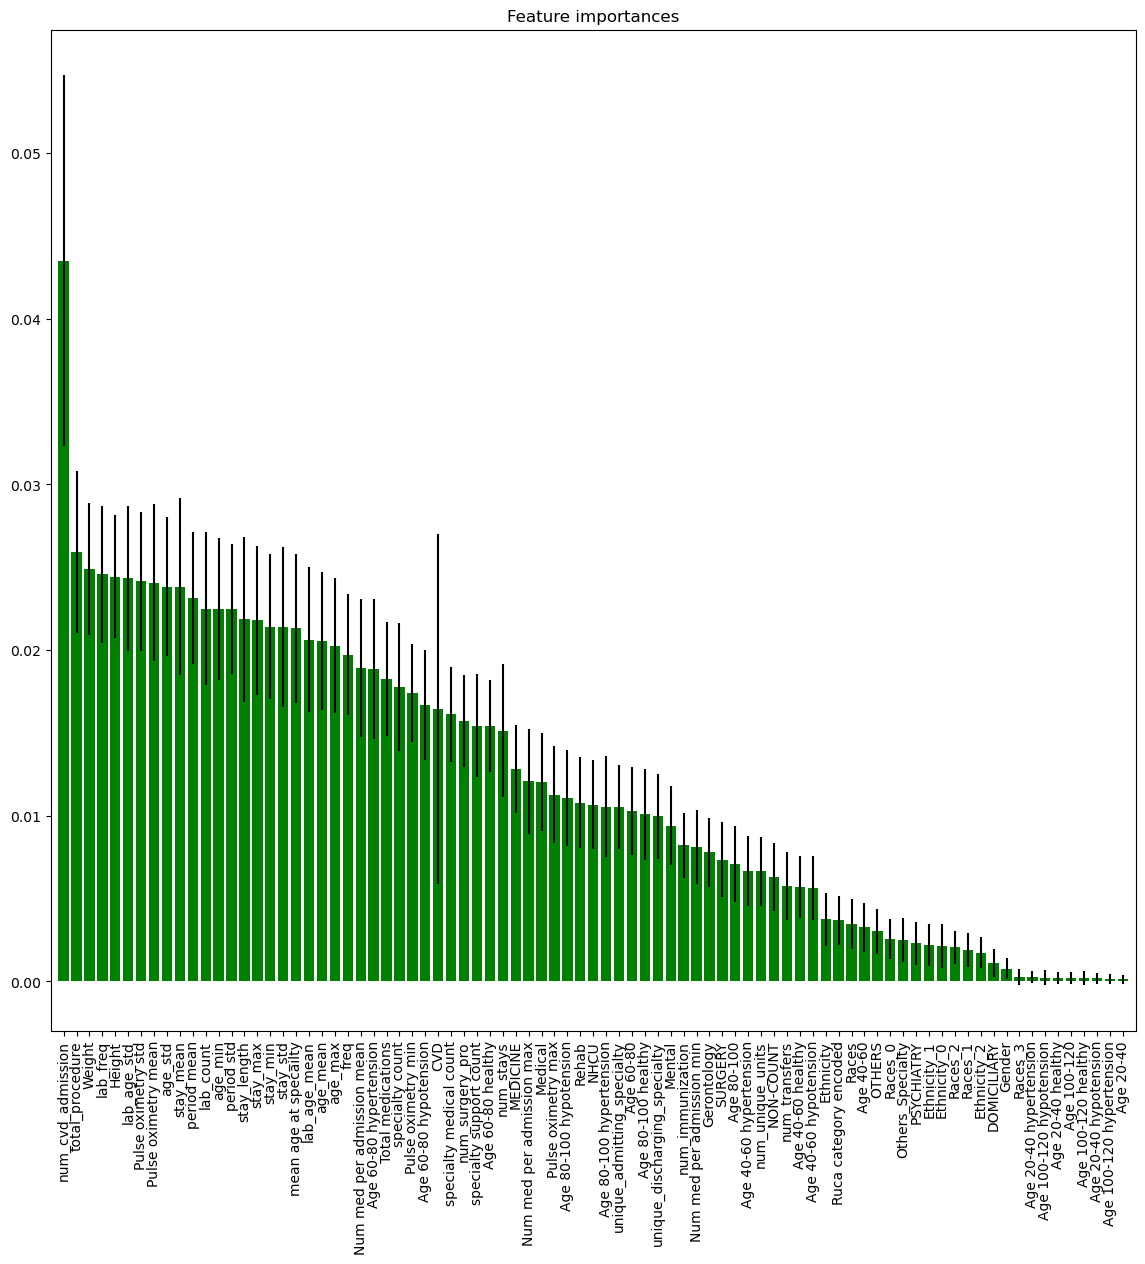

In [120]:
features_to_keep_mor_cvd_rf = rf_importance_score(X_mor_cvd, y_mor_cvd)

### Principle component analysis (PCA)

Fundemental dimension reduction technique

first step is decorrelation:

rotates data samples to be aligned with axes
shifts data asmples so they have mean zero
no information lost

fit() : learn how to shift samples

transform(): apply the learned transformation. It can also be applies test data

Resulting PCA features are not linearly correlated

Principle components: directions of variance

In [121]:
from sklearn.decomposition import PCA
def PCA_ncomponent(X):
    scaler = StandardScaler()
    X_sc = scaler.fit_transform(X)
    # Number of components to keep. if n_components is not set all components are kept:
    pca = PCA() 
    pca.fit(X_sc)

    plt.figure(1, figsize=(14, 13))
    plt.plot(pca.explained_variance_ratio_, linewidth=2)
    plt.axis('tight')
    plt.grid(True)
    plt.xlabel('n components')
    plt.ylabel('explained variance ratio')

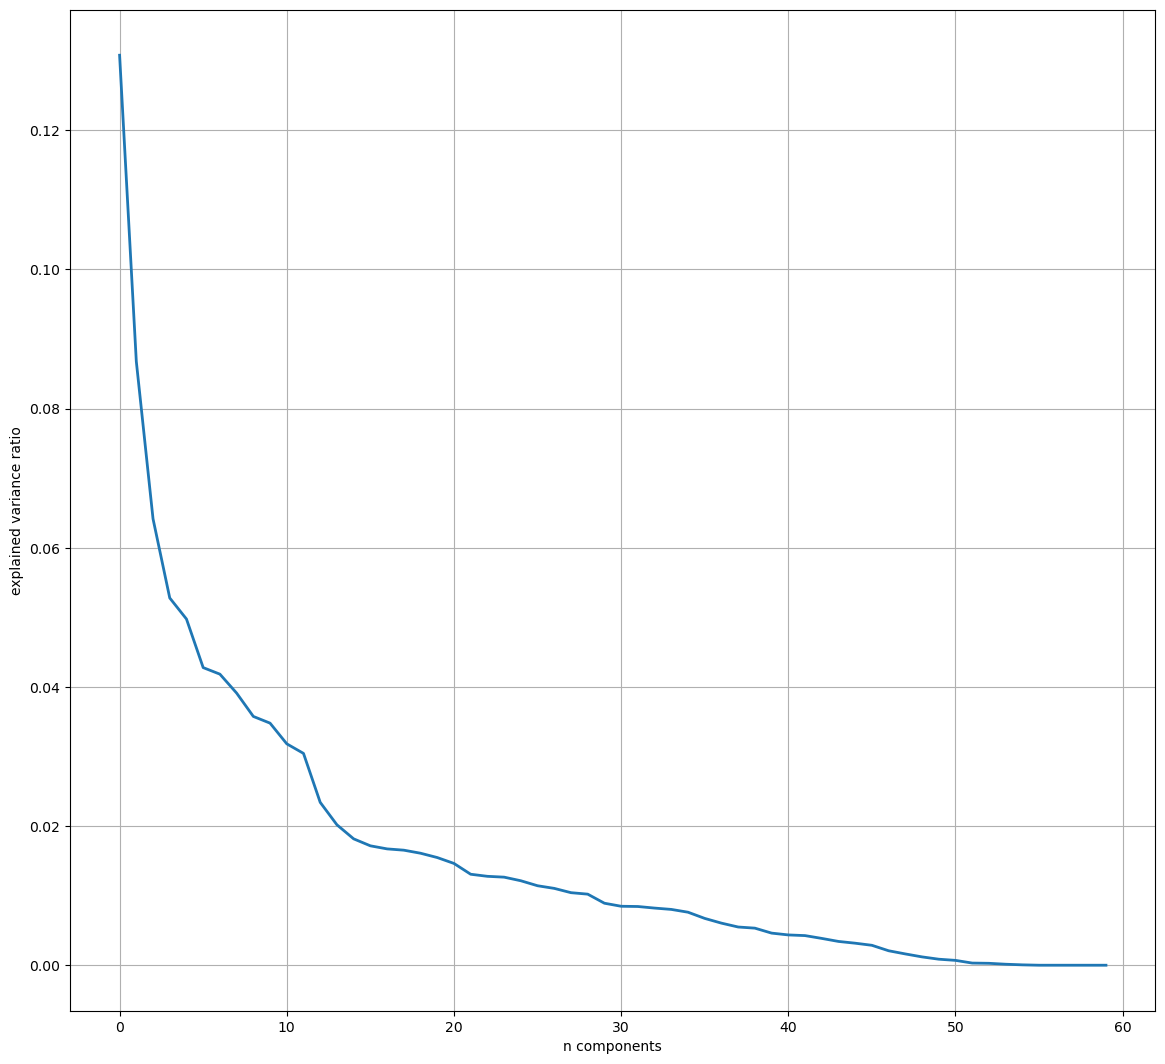

In [122]:
PCA_ncomponent(X_mor)

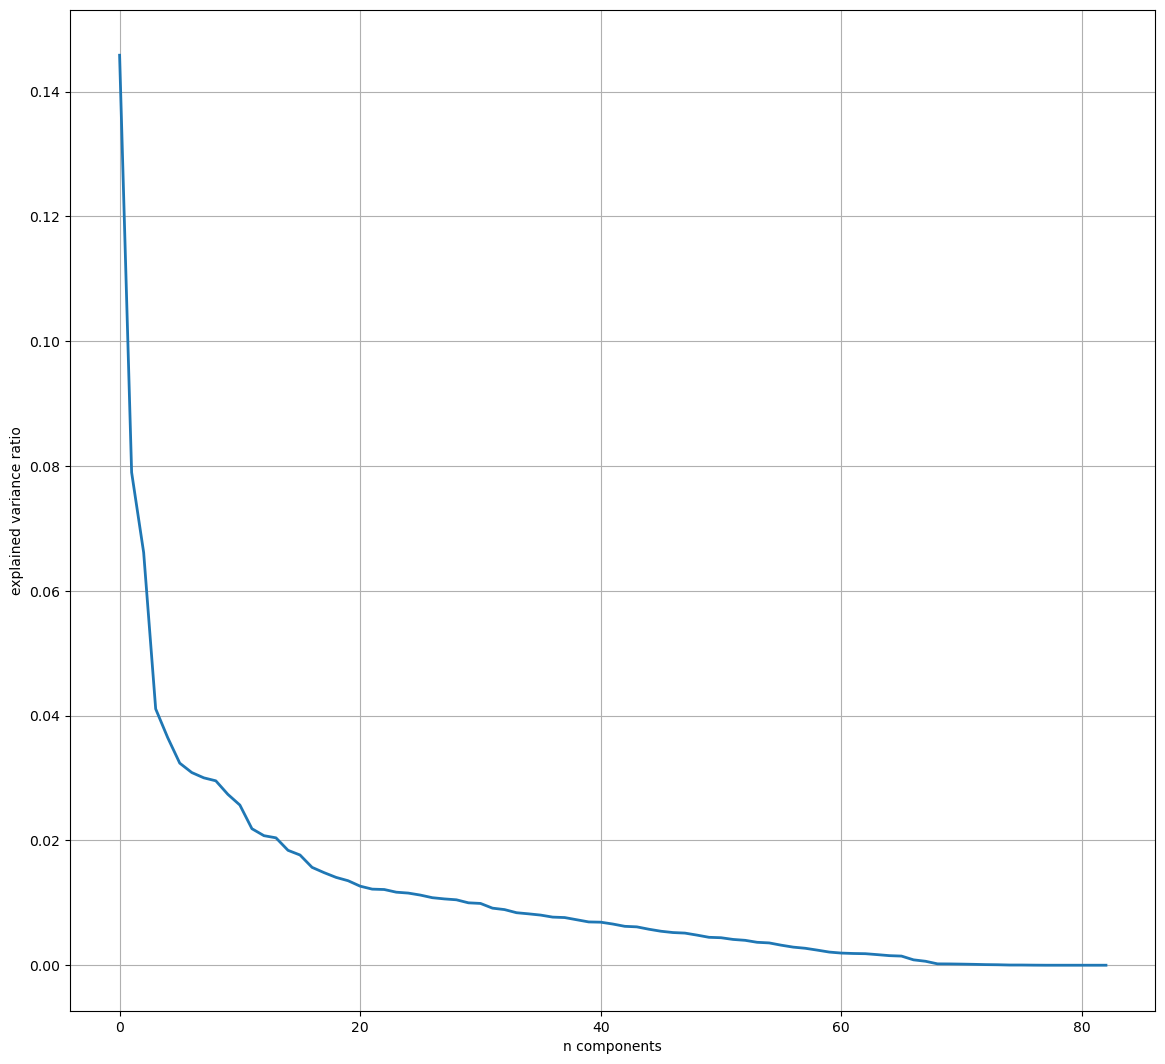

In [123]:
PCA_ncomponent(X_mor_cvd)

In [124]:
def PCA_select(X, n_num):    
    pca = PCA(n_num) 
    scaler = StandardScaler()
    X_sc = scaler.fit_transform(X)
    pca.fit(X_sc)
    # The components are sorted by decreasing explained_variance_.
    n_pcs= pca.components_.shape[0]

    # get the index of the most important feature on EACH component
    most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]

    # get the names
    most_important_names = [X.columns[most_important[i]] for i in range(n_pcs)]

    dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}

    # build the dataframe
    features_to_keep_pca = list(dic.values())
    return features_to_keep_pca

In [125]:
features_to_keep_mor_pca = PCA_select(X_mor, 20)
features_to_keep_mor_pca

['num_visits',
 'lab_age_mean',
 'lab_age_std',
 'Age 20-40 healthy',
 'Races_0',
 'Age 100-120 hypertension',
 'Age 100-120 hypertension',
 'Ethnicity_2',
 'Pulse oximetry max',
 'Pulse oximetry max',
 'Ethnicity_0',
 'Ethnicity_0',
 'Height',
 'Gender',
 'Pulse oximetry min',
 'Races_3',
 'Age 00-20',
 'Races_3',
 'Age 60-80 hypotension',
 'Ruca category encoded']

In [126]:
features_to_keep_mor_cvd_pca = PCA_select(X_mor_cvd, 20)
features_to_keep_mor_cvd_pca

['specialty count',
 'age_max',
 'period mean',
 'Races_0',
 'Age 20-40 healthy',
 'Races_2',
 'Age 100-120 hypertension',
 'stay_min',
 'Age 40-60 healthy',
 'Pulse oximetry max',
 'Pulse oximetry max',
 'Ethnicity_0',
 'num_cvd_admission',
 'DOMICILIARY',
 'SURGERY',
 'Num med per admission mean',
 'Height',
 'CVD',
 'Medical',
 'Others_Specialty']

In [127]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2 
# find best scored 20 features
# chi2: score function
def SelectBestK(X, y, n_num):
    select_feature = SelectKBest(chi2, k=n_num).fit(X, y)
    #print('Score list:', select_feature.scores_)
    #print('Feature list:', X.columns)
    score_df = pd.DataFrame({'Name':X.columns, 'Score':select_feature.scores_})
    score_df.sort_values(by = 'Score').reset_index(drop =True)
    score_list = list(zip(X.columns,select_feature.scores_))
    score_list = sorted(score_list, key = lambda x: x[1],reverse=True)
    features_to_keep_bestk = [name for name,score in score_list]
    return features_to_keep_bestk


In [128]:
features_to_keep_mor_bestk = SelectBestK(X_mor, y_mor, 20)

In [129]:
features_to_keep_mor_cvd_bestk = SelectBestK(X_mor_cvd, y_mor_cvd, 20)

In [130]:
set(features_to_keep_mor_rf[:20]).union(features_to_keep_mor_bestk[:20],set(features_to_keep_mor_pca))

{'Age 00-20',
 'Age 100-120 hypertension',
 'Age 20-40',
 'Age 20-40 healthy',
 'Age 20-40 hypertension',
 'Age 40-60',
 'Age 40-60 healthy',
 'Age 40-60 hypertension',
 'Age 60-80',
 'Age 60-80 hypotension',
 'Age 80-100',
 'Age 80-100 healthy',
 'Age 80-100 hypertension',
 'Age 80-100 hypotension',
 'CVD',
 'Ethnicity_0',
 'Ethnicity_2',
 'Gender',
 'Height',
 'Pulse oximetry max',
 'Pulse oximetry mean',
 'Pulse oximetry min',
 'Pulse oximetry std',
 'Races_0',
 'Races_3',
 'Ruca category encoded',
 'Total medications',
 'Weight',
 'age_mean',
 'age_std',
 'freq',
 'lab_age_mean',
 'lab_age_std',
 'lab_count',
 'lab_freq',
 'mean age at specailty',
 'num_immunization',
 'num_surgery_pro',
 'num_visits',
 'period mean',
 'period std',
 'total_procedure'}

In [131]:
set(features_to_keep_mor_cvd_rf[:20]).union(features_to_keep_mor_cvd_bestk[:20], set(features_to_keep_mor_cvd_pca))

{'Age 100-120 hypertension',
 'Age 20-40 healthy',
 'Age 20-40 hypertension',
 'Age 40-60 healthy',
 'Age 40-60 hypertension',
 'Age 40-60 hypotension',
 'Age 60-80 healthy',
 'Age 60-80 hypertension',
 'Age 60-80 hypotension',
 'Age 80-100 healthy',
 'Age 80-100 hypertension',
 'Age 80-100 hypotension',
 'CVD',
 'DOMICILIARY',
 'Ethnicity_0',
 'Height',
 'Medical',
 'Num med per admission mean',
 'Others_Specialty',
 'Pulse oximetry max',
 'Pulse oximetry mean',
 'Pulse oximetry std',
 'Races_0',
 'Races_2',
 'SURGERY',
 'Total medications',
 'Weight',
 'age_max',
 'age_min',
 'age_std',
 'lab_age_mean',
 'lab_age_std',
 'lab_count',
 'lab_freq',
 'mean age at specailty',
 'num_cvd_admission',
 'period mean',
 'period std',
 'specialty count',
 'specialty medical count',
 'stay_length',
 'stay_max',
 'stay_mean',
 'stay_min',
 'stay_std',
 'total_procedure'}